In [0]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob as tb
import re

In [0]:
url= 'https://www.amazon.in/Redmi-Note-Pro-Storage-Processor/product-reviews/B07X4PXKZQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews='

response = requests.get(url)
#print(response.content)
# creating soup object to iterate over the extracted content 
soup = BeautifulSoup(response.content,"html")
#print(soup)

allReviews= soup.findAll('span', attrs={'class','review-text-content'})
for i in range(len(allReviews)):
    allReviews[i]=allReviews[i].text.strip('\n')

In [0]:
#creating a dataframe
import pandas as pd
mob_reviews= pd.DataFrame(columns= ['Reviews'])
mob_reviews['Reviews']= allReviews
mob_reviews

,Reviews
0,after using 17 days ..i would like to say ..if...
1,💝 Awesome mobile in this price.💝 Value of mone...
2,"Worst phone, lot of problems"
3,"I dont know why some people giving less stars,..."
4,Battery:goodScreen:goodGaming:goodCamera:for c...
5,one of the best mobile under this price. This ...
6,Huge heating problem. Right side of the camera...
7,Camera is very poor.Device set-up is also diff...
8,Very good phone. Picture quality is amazing.
9,"I have purchased this mobile recently, I'm fac..."


In [0]:
#cleaning the reviews

#def clean_reviews(reviews):
#  reviews= re.sub(r'\n', ' ', reviews)

#mob_reviews['Reviews']= mob_reviews['Reviews'].apply(clean_reviews)
#mob_reviews

In [0]:
def get_subjectivity(reviews):
  return tb(reviews).sentiment.subjectivity

def get_polarity(reviews):
  return tb(reviews).sentiment.polarity

mob_reviews['Subjectivity']= mob_reviews['Reviews'].apply(get_subjectivity)
mob_reviews['Polarity']= mob_reviews['Reviews'].apply(get_polarity)
mob_reviews

,Reviews,Subjectivity,Polarity
0,after using 17 days ..i would like to say ..if...,0.440625,-0.114583
1,💝 Awesome mobile in this price.💝 Value of mone...,0.700000,0.700000
2,"Worst phone, lot of problems",1.000000,-1.000000
3,"I dont know why some people giving less stars,...",0.467262,0.184077
4,Battery:goodScreen:goodGaming:goodCamera:for c...,0.000000,0.000000
5,one of the best mobile under this price. This ...,0.619841,0.418849
6,Huge heating problem. Right side of the camera...,0.611905,0.095238
7,Camera is very poor.Device set-up is also diff...,0.300000,0.200000
8,Very good phone. Picture quality is amazing.,0.840000,0.755000
9,"I have purchased this mobile recently, I'm fac...",0.601250,0.446250


In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('ggplot')

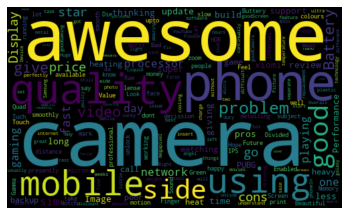

In [0]:
all_words= ' '.join([twts for twts in mob_reviews['Reviews']])
wordCloud= WordCloud(width= 500, height= 300, random_state= 21, max_font_size= 120).generate(all_words)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [0]:
def get_analysis(score):
  if score> 0:
    return 'Positive'
  elif score< 0:
    return 'Negative'
  else:
    return 'Neutral'

mob_reviews['Analysis']= mob_reviews['Polarity'].apply(get_analysis)
mob_reviews

,Reviews,Subjectivity,Polarity,Analysis
0,after using 17 days ..i would like to say ..if...,0.440625,-0.114583,Negative
1,💝 Awesome mobile in this price.💝 Value of mone...,0.700000,0.700000,Positive
2,"Worst phone, lot of problems",1.000000,-1.000000,Negative
3,"I dont know why some people giving less stars,...",0.467262,0.184077,Positive
4,Battery:goodScreen:goodGaming:goodCamera:for c...,0.000000,0.000000,Neutral
5,one of the best mobile under this price. This ...,0.619841,0.418849,Positive
6,Huge heating problem. Right side of the camera...,0.611905,0.095238,Positive
7,Camera is very poor.Device set-up is also diff...,0.300000,0.200000,Positive
8,Very good phone. Picture quality is amazing.,0.840000,0.755000,Positive
9,"I have purchased this mobile recently, I'm fac...",0.601250,0.446250,Positive


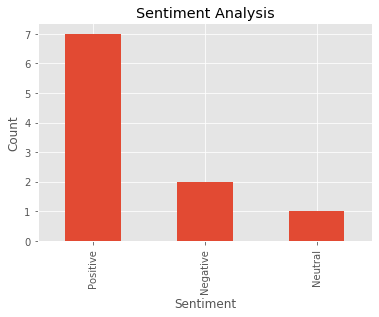

In [0]:
mob_reviews['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
mob_reviews['Analysis'].value_counts().plot(kind= 'bar')
plt.show()